In [1]:
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10,7)
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import initializers

2023-04-07 16:38:19.292363: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-07 16:38:19.346741: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-07 16:38:19.348089: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-07 16:38:20.276704: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
coins = pd.read_csv("coins.csv")
coins.tail(10)

,reflectance,weight,denomination
169,26.913923,5.611840,2
170,27.800820,5.595559,2
171,28.444039,6.162531,2
172,28.414699,4.792008,2
173,28.869236,5.383916,2
174,26.650728,5.420213,2
175,27.492055,6.149025,2
176,29.157397,7.035390,2
177,27.741846,5.032280,2
178,27.629866,5.395878,2


<Axes: xlabel='reflectance', ylabel='weight'>

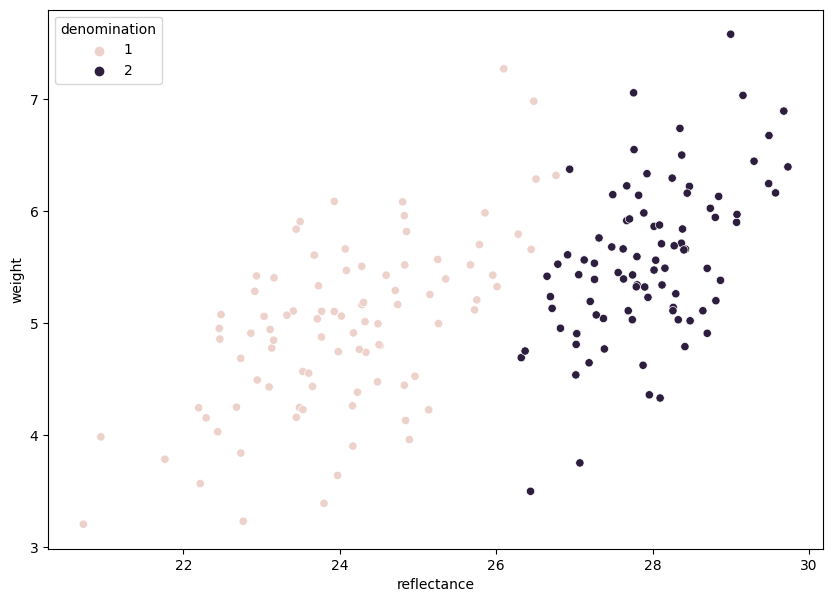

In [3]:
sns.scatterplot(x="reflectance",y="weight",data=coins, hue="denomination")

In [4]:
# test-train split
X = coins[["reflectance","weight"]].to_numpy()
y = coins[["denomination"]].to_numpy() - 1  #substract one to make denomination set 0-1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
## Initiate classifier and train it using the X_train data and the y_train labels

## make sure you instantiate your classifier and name it model
model =Sequential()
model.add(Dense(1, activation='leaky_relu', kernel_initializer='he_normal',input_shape=(2,)))
model.add(Dense(2, activation='softmax'))


In [21]:
## train your model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_train, y_train, epochs=1500, batch_size=30, verbose=0)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 2)                 4         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [22]:
## test the accuracy of your model
accuracy=model.evaluate(X,y)
#print('Accuracy: %.2f' %(accuracy*100))

6/6 [==============================] - 0s 2ms/step - loss: 0.3714 - accuracy: 0.9665


313/313 [==============================] - 0s 1ms/step


<Axes: xlabel='reflectance', ylabel='weight'>

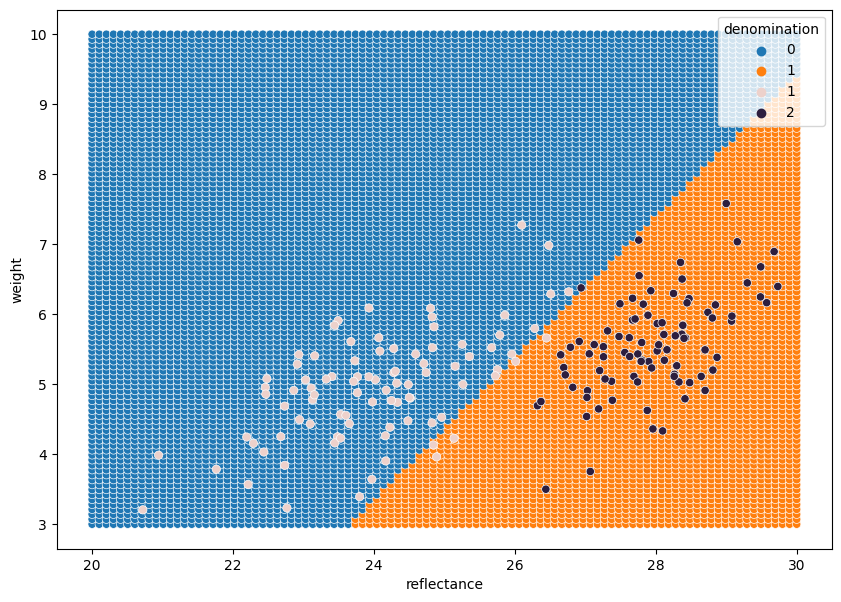

In [23]:
## plot the decision boundary of your classifier along with the scatterplot of the training data
## hint: look at the ann example
## Plot the decision boundary
reflectance=np.linspace(20,30,100)
weight=np.linspace(3,10,100)
from itertools import product
randomdata = np.array(list(product(reflectance,weight)))
g = model.predict(randomdata)
db=pd.DataFrame({"reflectance":randomdata[:,0],"weight":randomdata[:,1],"label":list(map(np.argmax,g)) })
sns.scatterplot(data=db,x="reflectance",y="weight",hue="label")
sns.scatterplot(data=coins,x="reflectance",y="weight",hue="denomination")



In [19]:
## additional stuff you want to add 